In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '3'
os.environ['VL_ROOT_DIR'] = '/home/avc6555/research/MedH/Mitigation/LVLM_interp'

import sys
sys.path.append("/home/avc6555/research/MedH/Mitigation/LVLM_interp")

from methods.llava_utils import retrieve_logit_lens_llava, load_llava_state
# from methods.blip_utils import retrieve_logit_lens_blip, load_blip_state

from methods.utils import load_image
from methods.algorithms import internal_confidence, internal_confidence_heatmap, internal_confidence_segmentation

from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

Current working directory: /home/avc6555/research/MedH/Mitigation/LVLM_interp/demos ['/data/aofei/conda/env/llava_v1.5/lib/python310.zip', '/data/aofei/conda/env/llava_v1.5/lib/python3.10', '/data/aofei/conda/env/llava_v1.5/lib/python3.10/lib-dynload', '', '/home/avc6555/.local/lib/python3.10/site-packages', '/data/aofei/conda/env/llava_v1.5/lib/python3.10/site-packages', '__editable__.llava-1.2.2.post1.finder.__path_hook__', '/data/aofei/conda/env/llava_v1.5/lib/python3.10/site-packages/setuptools/_vendor', '/home/avc6555/research/MedH/Mitigation/LVLM_interp', '/home/avc6555/research/MedH/Mitigation/LVLM_interp/src/caption']


/data/aofei/conda/env/llava_v1.5/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[2024-11-17 14:34:20,955] [INFO] [real_accelerator.py:161:get_accelerator] Setting ds_accelerator to cuda (auto detect)


In [2]:
model_name = "llava7b" # or "blip7b"

if model_name.startswith("llava"):
    model_state = load_llava_state()
    retrieve_logit_lens = retrieve_logit_lens_llava
# elif model_name.startswith("blip"):
#     model_state = load_blip_state()
#     retrieve_logit_lens = retrieve_logit_lens_blip

You are using a model of type llava to instantiate a model of type llava_mistral. This is not supported for all configurations of models and can yield errors.
/data/aofei/conda/env/llava_v1.5/lib/python3.10/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]/data/aofei/conda/env/llava_v1.5/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Loading checkpoint shards: 100%|██████████| 2/2 [00:01<00

In [4]:
type(model_state)

dict

In [40]:
# img_path = "/home/avc6555/research/MedH/Mitigation/LVLMs/llava-med/visualize/images/"+ "example1.jpg"
img_path = "/home/avc6555/research/MedH/Mitigation/LVLMs/llava-med/visualize/images/"+ "example2.jpg"
caption, softmax_probs = retrieve_logit_lens(model_state, img_path)

In [41]:
caption

"organs, such as the heart and lungs, can be seen on the right side. The heart is located towards the center of the image, and the lungs are spread out across the right side of the ribcage. This X-ray provides a clear view of the person's internal anatomy, highlighting the bones and organs that make up the human body."

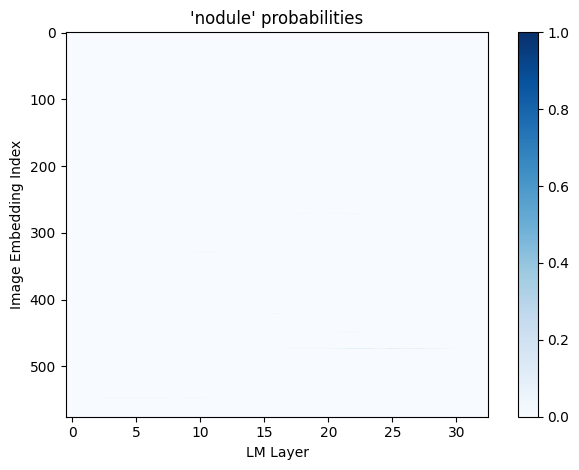

In [50]:
class_ = 'nodule'
heatmap_data = internal_confidence_heatmap(model_state['tokenizer'], softmax_probs, class_)
num_image_embeddings = softmax_probs.shape[2]
im = plt.imshow(heatmap_data, aspect=30/num_image_embeddings, cmap='Blues', interpolation='nearest')
plt.title(f"'{class_}' probabilities")
plt.xlabel("LM Layer")
plt.ylabel("Image Embedding Index")
plt.tight_layout()
plt.clim(0, 1)
plt.colorbar()
plt.show()

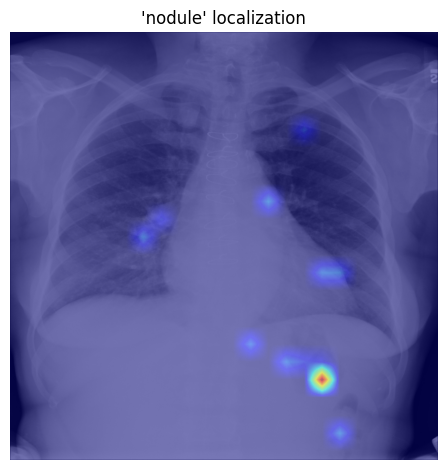

: 

In [ ]:
if model_name.startswith("llava"):
    img = load_image(img_path)
    img_width, img_height = img.size

    segmentation = internal_confidence_segmentation(model_state['tokenizer'], softmax_probs, class_, num_patches=24)
    segmentation_resized = (np.array(Image.fromarray(segmentation).resize((img_width, img_height), Image.BILINEAR)))

    plt.imshow(img)
    plt.imshow(segmentation_resized, cmap='jet', interpolation='bilinear', alpha=.5)
    plt.axis('off')
    plt.title(f"'{class_}' localization")
    plt.tight_layout()
    plt.show()
else:
    print(f"Cannot visualize localization for {model_name}")

In [6]:
caption

"to be staring at something, possibly observing its surroundings or focusing on a point of interest. The cat's position on the blanket suggests that it is enjoying the warmth and coziness of its resting spot."

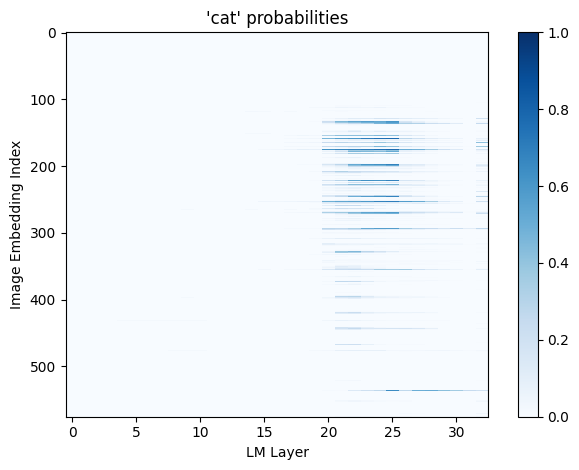

In [7]:
class_ = 'cat'
heatmap_data = internal_confidence_heatmap(model_state['tokenizer'], softmax_probs, class_)
num_image_embeddings = softmax_probs.shape[2]
im = plt.imshow(heatmap_data, aspect=30/num_image_embeddings, cmap='Blues', interpolation='nearest')
plt.title(f"'{class_}' probabilities")
plt.xlabel("LM Layer")
plt.ylabel("Image Embedding Index")
plt.tight_layout()
plt.clim(0, 1)
plt.colorbar()
plt.show()

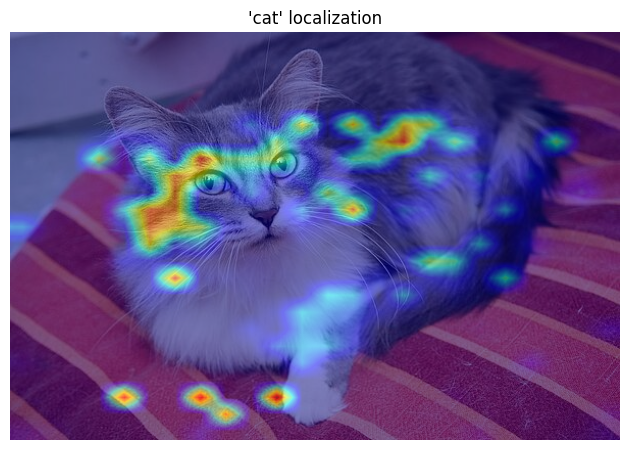

In [8]:
if model_name.startswith("llava"):
    img = load_image(img_path)
    img_width, img_height = img.size

    segmentation = internal_confidence_segmentation(model_state['tokenizer'], softmax_probs, class_, num_patches=24)
    segmentation_resized = (np.array(Image.fromarray(segmentation).resize((img_width, img_height), Image.BILINEAR)))

    plt.imshow(img)
    plt.imshow(segmentation_resized, cmap='jet', interpolation='bilinear', alpha=.5)
    plt.axis('off')
    plt.title(f"'{class_}' localization")
    plt.tight_layout()
    plt.show()
else:
    print(f"Cannot visualize localization for {model_name}")

In [ ]:
print(f"Internal confidence: {internal_confidence(model_state['tokenizer'], softmax_probs, class_)}")